# Autism Spectrum Disorder Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d fabdelja/autism-screening-for-toddlers

Dataset URL: https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers
License(s): unknown
100%|███████████████████████████████████████| 81.7k/81.7k [00:00<00:00, 169kB/s]
100%|███████████████████████████████████████| 81.7k/81.7k [00:00<00:00, 168kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Autism Spectrum Disorder Classification/autism-screening-for-toddlers.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Autism Spectrum Disorder Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Autism_Screening_Data_Combined.csv')

In [6]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [7]:
df.shape

(6075, 15)

In [8]:
df.size

91125

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,6075.0,0.693169,0.461217,0.0,0.0,1.0,1.0,1.0
A2,6075.0,0.485103,0.499819,0.0,0.0,0.0,1.0,1.0
A3,6075.0,0.537449,0.498637,0.0,0.0,1.0,1.0,1.0
A4,6075.0,0.547490,0.497781,0.0,0.0,1.0,1.0,1.0
A5,6075.0,0.543868,0.498113,0.0,0.0,1.0,1.0,1.0
A6,6075.0,0.443128,0.496796,0.0,0.0,0.0,1.0,1.0
A7,6075.0,0.497942,0.500037,0.0,0.0,0.0,1.0,1.0
A8,6075.0,0.538436,0.498562,0.0,0.0,1.0,1.0,1.0
A9,6075.0,0.429794,0.495087,0.0,0.0,0.0,1.0,1.0
A10,6075.0,0.599835,0.489972,0.0,0.0,1.0,1.0,1.0


In [11]:
df.isnull().sum()

A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
Age           0
Sex           0
Jauundice     0
Family_ASD    0
Class         0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(847)

In [13]:
df.nunique()

A1             2
A2             2
A3             2
A4             2
A5             2
A6             2
A7             2
A8             2
A9             2
A10            2
Age           76
Sex            2
Jauundice      2
Family_ASD     2
Class          2
dtype: int64

## Data Visualization

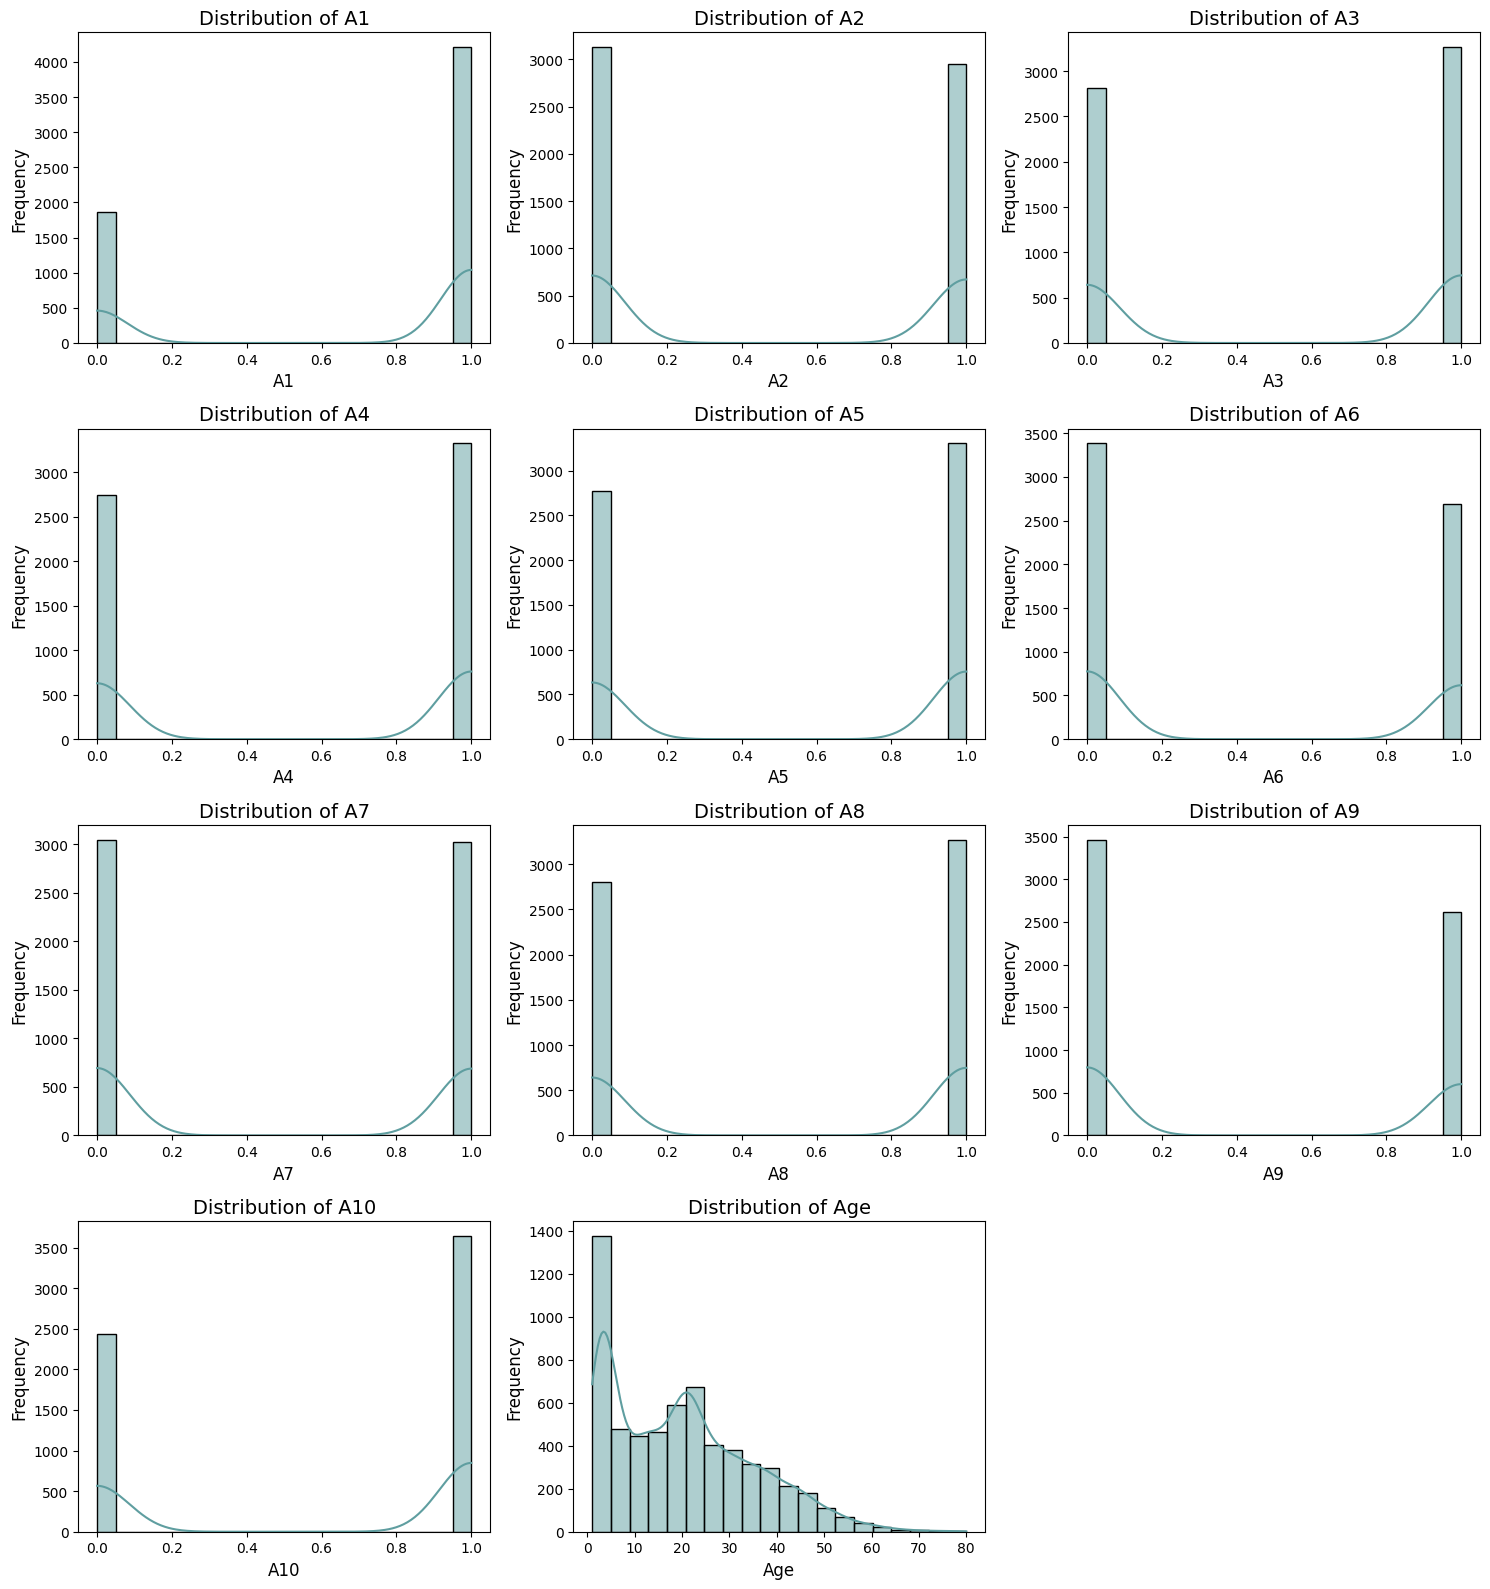

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

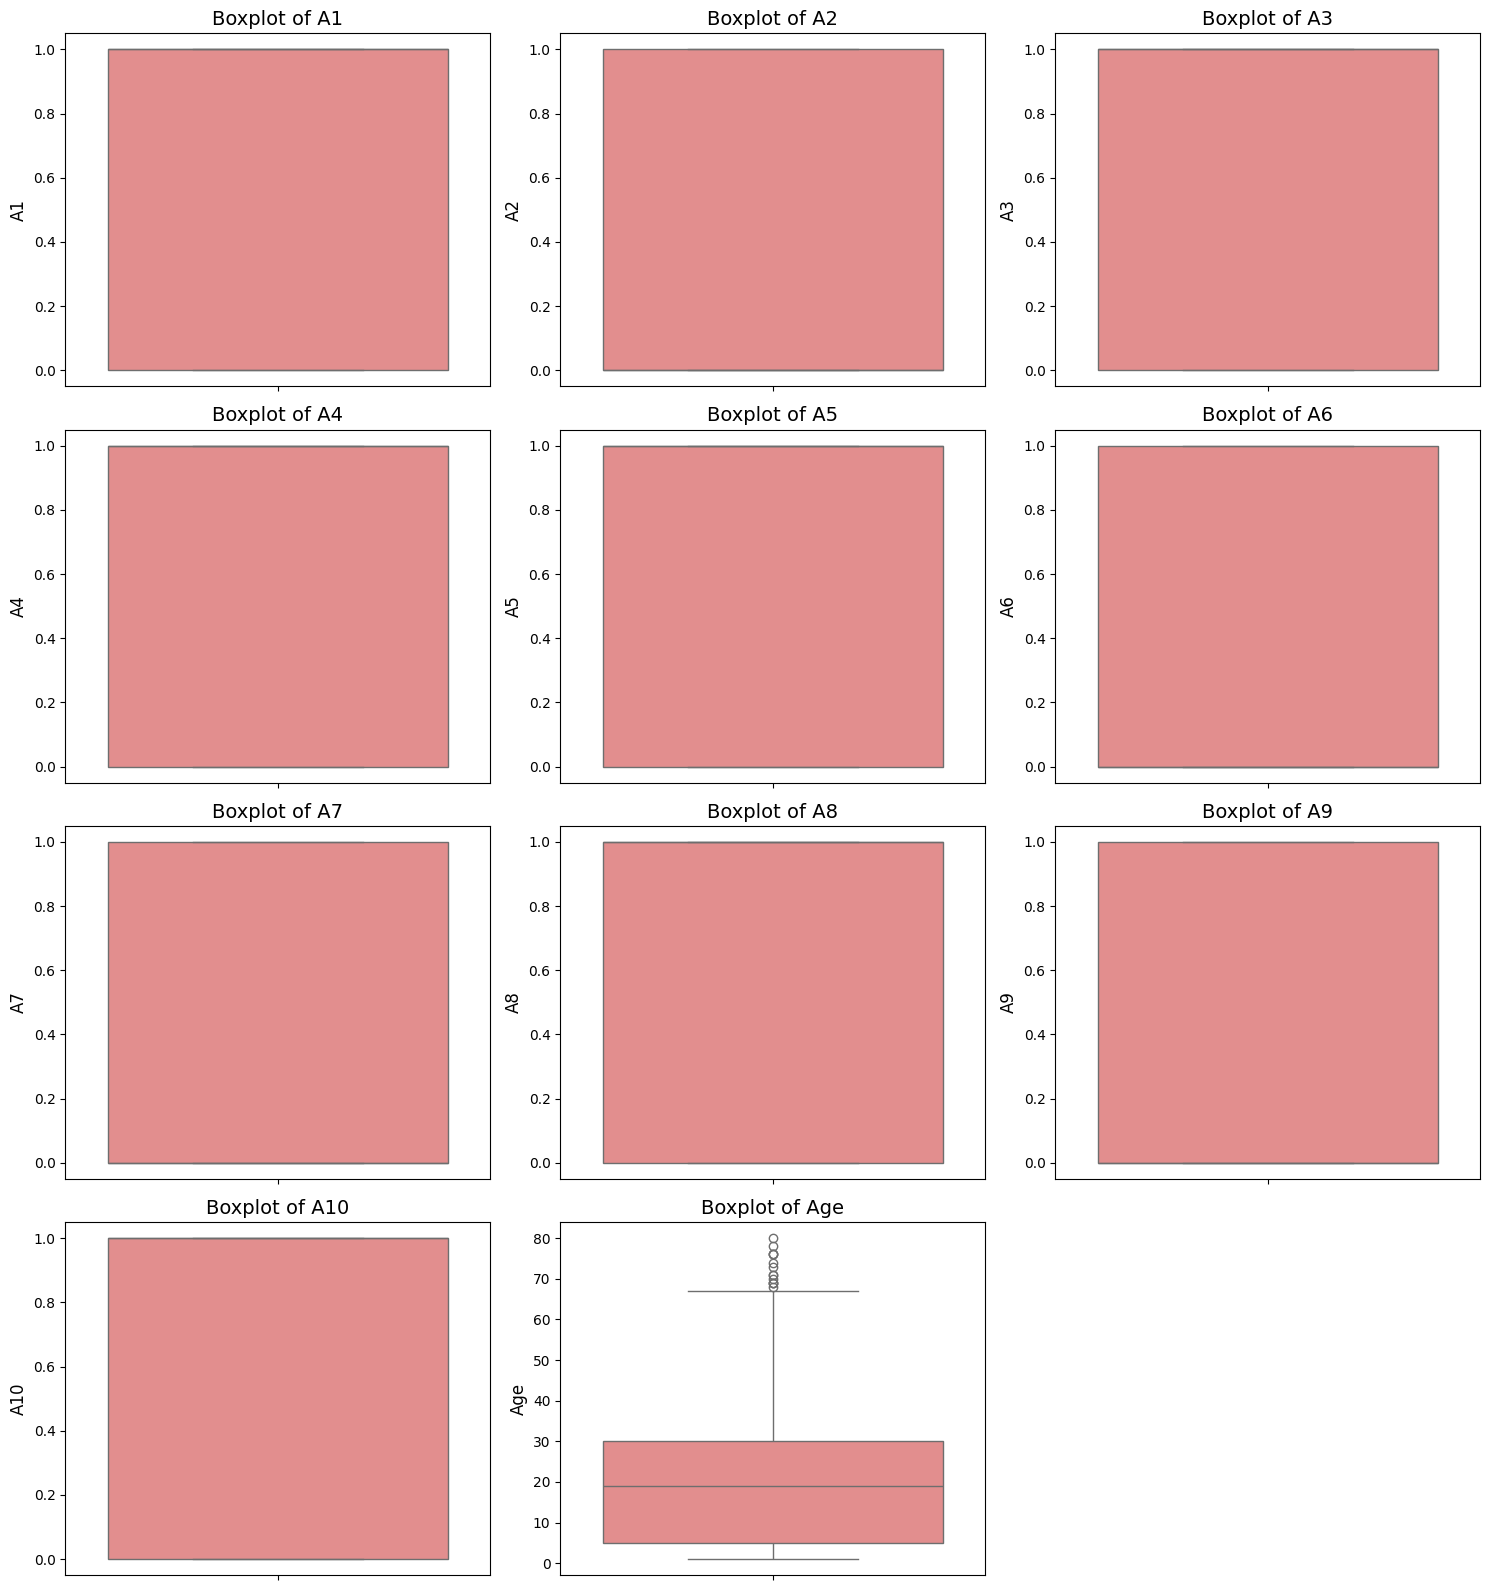

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

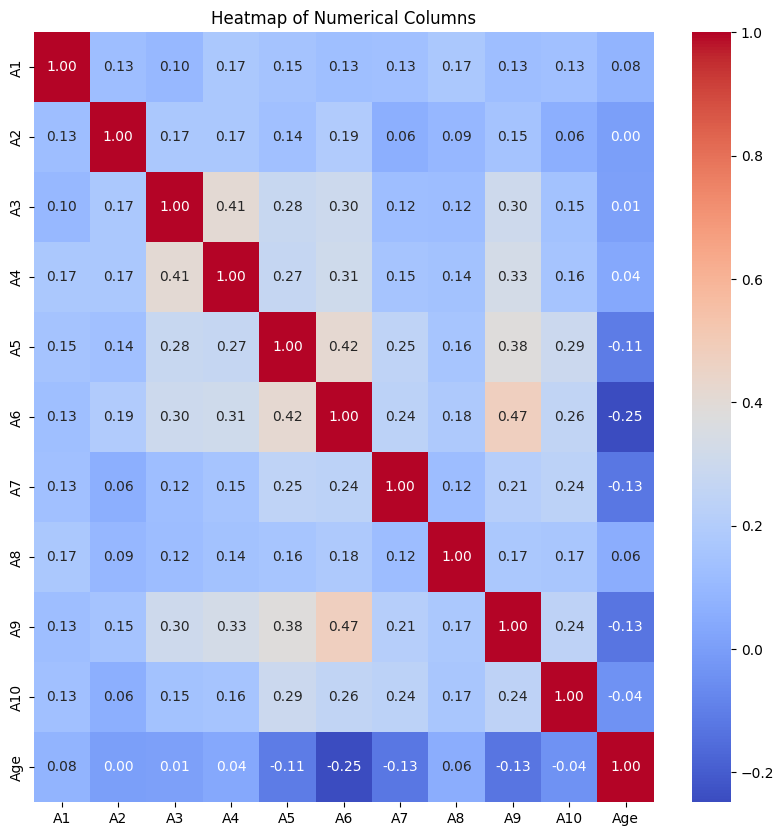

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Dropping duplicated rows

df.drop_duplicates(inplace=True)

In [19]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [20]:
X = df.drop('Class', axis=1)
y = df['Class']

In [21]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [22]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [24]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9130019120458891, 0.9158699808795411, 0.994263862332696, 0.9732313575525813, 0.9980879541108987, 0.9990439770554493, 0.9598470363288719, 0.9703632887189293, 0.9254302103250478]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       732
           1       0.88      0.83      0.85       314

    accuracy                           0.91      1046
   macro avg       0.90      0.89      0.89      1046
weighted avg       0.91      0.91      0.91      1046

Confusion Matrix:
 [[695  37]
 [ 54 260]]


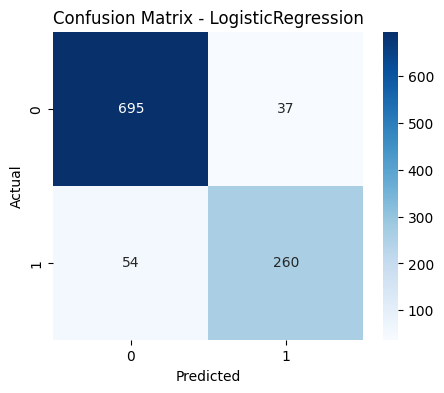

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       732
           1       0.86      0.86      0.86       314

    accuracy                           0.92      1046
   macro avg       0.90      0.90      0.90      1046
weighted avg       0.92      0.92      0.92      1046

Confusion Matrix:
 [[689  43]
 [ 45 269]]


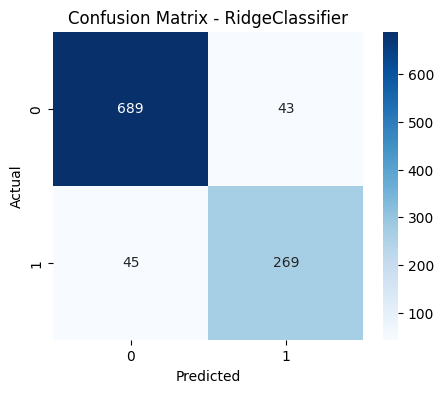

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       0.99      0.99      0.99       314

    accuracy                           0.99      1046
   macro avg       0.99      0.99      0.99      1046
weighted avg       0.99      0.99      0.99      1046

Confusion Matrix:
 [[729   3]
 [  3 311]]


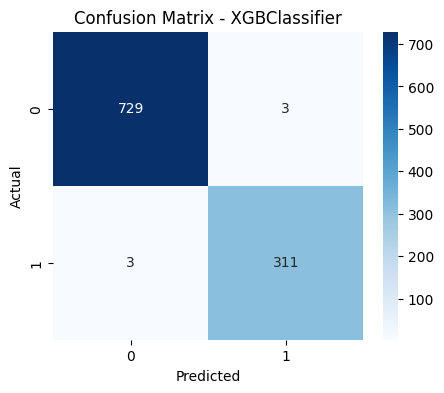

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       732
           1       0.98      0.92      0.95       314

    accuracy                           0.97      1046
   macro avg       0.97      0.96      0.97      1046
weighted avg       0.97      0.97      0.97      1046

Confusion Matrix:
 [[727   5]
 [ 25 289]]


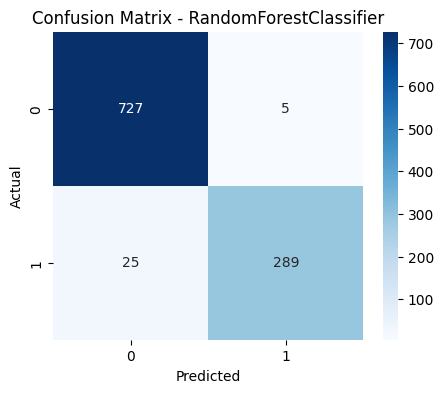

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       0.99      1.00      1.00       314

    accuracy                           1.00      1046
   macro avg       1.00      1.00      1.00      1046
weighted avg       1.00      1.00      1.00      1046

Confusion Matrix:
 [[730   2]
 [  0 314]]


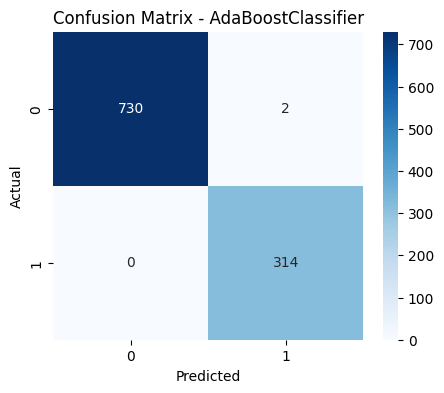

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       732
           1       1.00      1.00      1.00       314

    accuracy                           1.00      1046
   macro avg       1.00      1.00      1.00      1046
weighted avg       1.00      1.00      1.00      1046

Confusion Matrix:
 [[731   1]
 [  0 314]]


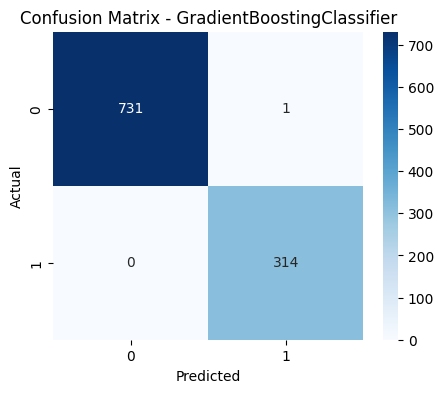

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       732
           1       0.95      0.92      0.94       314

    accuracy                           0.96      1046
   macro avg       0.96      0.95      0.95      1046
weighted avg       0.96      0.96      0.96      1046

Confusion Matrix:
 [[718  14]
 [ 26 288]]


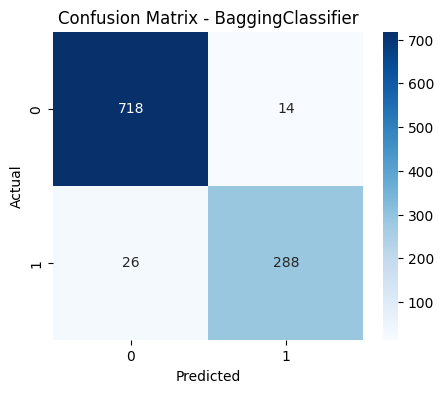

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.95      0.95      0.95       314

    accuracy                           0.97      1046
   macro avg       0.96      0.96      0.96      1046
weighted avg       0.97      0.97      0.97      1046

Confusion Matrix:
 [[716  16]
 [ 17 297]]


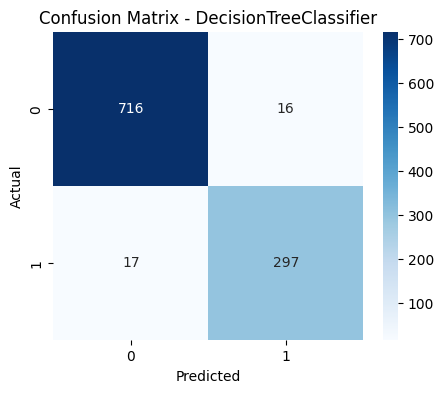

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       732
           1       0.95      0.79      0.86       314

    accuracy                           0.93      1046
   macro avg       0.93      0.89      0.91      1046
weighted avg       0.93      0.93      0.92      1046

Confusion Matrix:
 [[719  13]
 [ 65 249]]


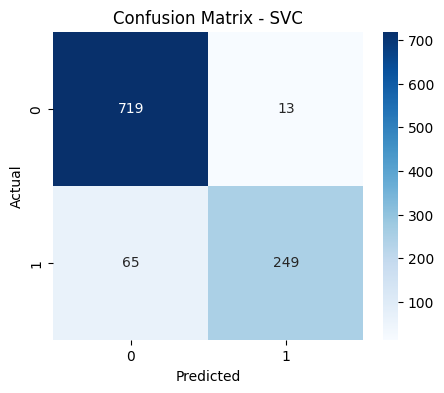

In [25]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()